<a href="https://colab.research.google.com/github/yashdeeph709/tensors-with-ztm/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [11]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating data to view and fit

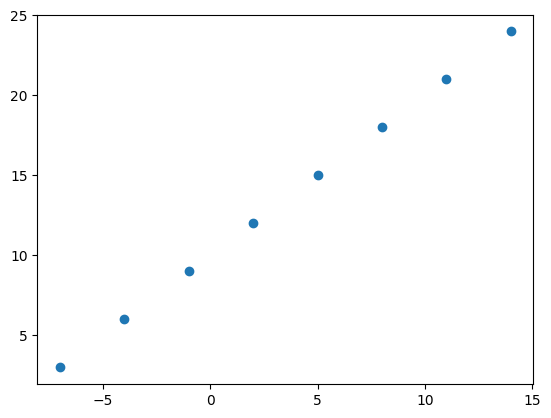

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
Y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, Y)
plt.show()

In [13]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes


In [14]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [15]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [16]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [17]:
X[0].ndim

0

In [18]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
Y = tf.cast(tf.constant(Y), dtype = tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

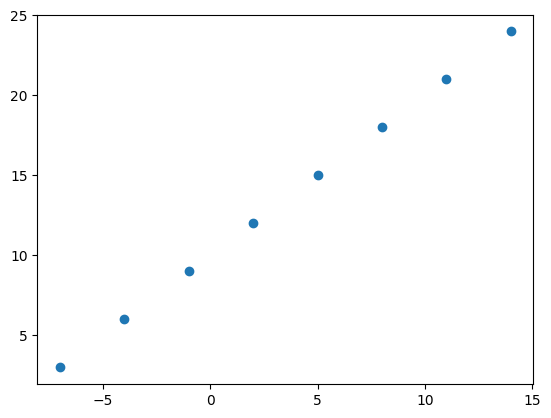

In [20]:
plt.scatter(X, Y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as hidden layer of a deep learning model.
2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and evaluation metrics ( what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (features and labels).

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is mean absolute error),
              optimizer = tf.keras.optimizers.SGD(), # Stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - loss: 12.8269 - mae: 12.8269
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.6944 - mae: 12.6944
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 12.5619 - mae: 12.5619
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12.4294 - mae: 12.4294
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.2969 - mae: 12.2969


In [22]:
# Checkout X and Y
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims([17.], axis = -1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[6.294448]], dtype=float32)

In [24]:
y_pred + 11

array([[17.294449]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units(neurons), within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or more data (give the model more examples to learn from).

In [25]:
# Let's rebuild our model
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 12.6414 - mae: 12.6414
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.5089 - mae: 12.5089
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.3764 - mae: 12.3764
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.2439 - mae: 12.2439
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.1114 - mae: 12.1114
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 11.9789 - mae: 11.9789
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.8464 - mae: 11.8464
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.7139 - mae: 11.7139
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.5814 - mae: 11.5814
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.4489 - mae: 11.4489
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.3164 - mae: 11.3164
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.1839 - mae: 11.1839
Epoch 13/100
1/1 ━━━━━━━

In [26]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [27]:
# Let's see if our model's prediction has improved...
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[30.015463]], dtype=float32)

In [28]:
# Let's see if we can improve the optimizer

# 1. Create the model
model = tf.keras.Sequential([ tf.keras.layers.Dense(100, activation="relu"), tf.keras.layers.Dense(1)]);

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

# 3. Train the model
model.fit(tf.expand_dims(X, axis=-1),Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.7090 - mae: 13.7090
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.8568 - mae: 12.8568
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.0072 - mae: 12.0072
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.1655 - mae: 11.1655
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.5346 - mae: 10.5346
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.9267 - mae: 9.9267
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.3130 - mae: 9.3130
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.6879 - mae: 8.6879
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 8.0493 - mae: 8.0493
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.3952 - mae: 7.3952
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6.7216 - mae: 6.7216
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 6.0310 - mae: 6.0310
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [29]:
# Let's see if our model's prediction has improved
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[26.869507]], dtype=float32)

### Evaluating our model

In practice, a typical workflow you'll go through when building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it --> again same

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

Its a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against teh ground truth (the original labels)

In [30]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [31]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

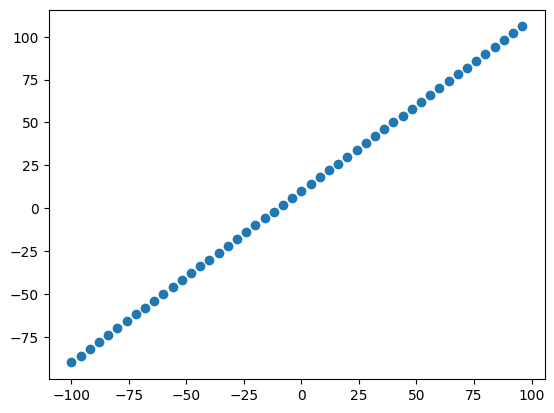

In [32]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluatted on this data to test what it has learned, this set is typically 10-15% of the data available


In [33]:
# Check the length of how many samples we have
len(X)

50

In [34]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples ( 80% of the data )
y_train = y[:40] # last 10 are the testing samples ( 20% of the data )

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... Lets visualize it again!



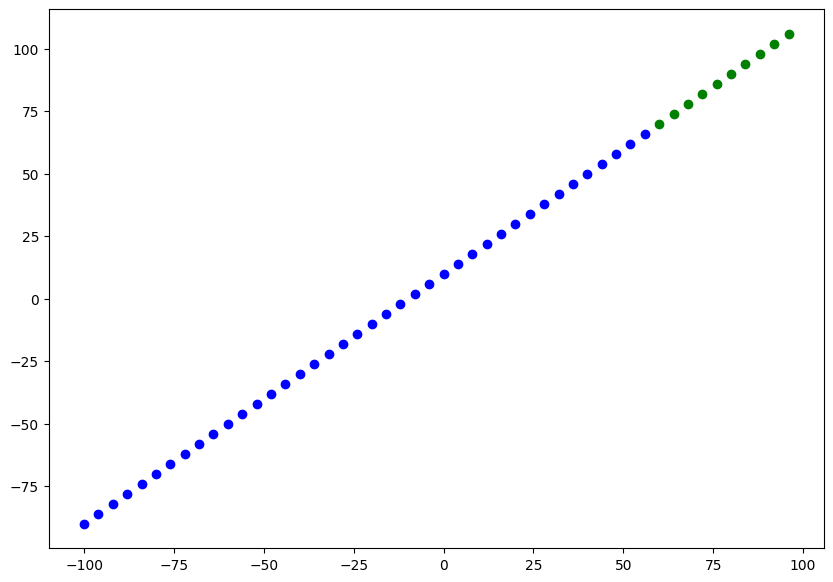

In [35]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")


In [36]:
# Let's have a look at how to build a neural network for this data

# 1. Create a model
model = tf.keras.Sequential([ tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=5)


In [37]:
# Lets create a model which builds automatically by defining the inputf-shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model ( same as above)
model = tf.keras.Sequential([ tf.keras.layers.Dense(1, input_shape=[1])])

# 2. Compile our model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


To illustrate the suggested approach, here's how you could define the model with an explicit `Input` layer:

In [38]:
tf.random.set_seed(42)

# 1. Create a model using an explicit Input layer
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)), # Explicitly define the input layer
    tf.keras.layers.Dense(1) # Changed from Dense(3) to Dense(1) to match the output shape
])

# 2. Compile our model
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

In [39]:
### Visualizing our model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trians.
* Non-trainable params - these parameters aren't updated during training ( this is typical when you bring pre-trained models) **Transfer Learning**

**Resource:** For more in-depth overview of the trainable  parameters within a layer, check out **MIT's introduction to deep learnng video**

**Excercize:**  Try playing around witth the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`


In [40]:
# let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [41]:
# Get a summary of our model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

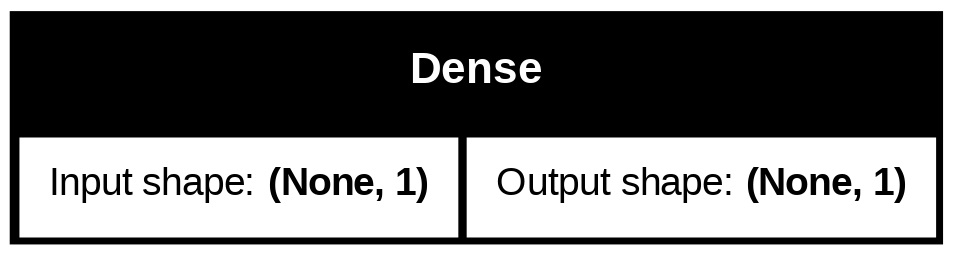

In [42]:
from tensorflow.keras.utils import plot_model

import sys
!{sys.executable} -m pip install pydot
!{sys.executable} -m pip install graphviz
plot_model(model,show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [43]:
# Make some predictions
y_pred = model.predict(tf.expand_dims(X_test, axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[56.114494],
       [59.726612],
       [63.33873 ],
       [66.95084 ],
       [70.562965],
       [74.17509 ],
       [77.7872  ],
       [81.39932 ],
       [85.011444],
       [88.62356 ]], dtype=float32)

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, its a good idea to turn it into a function.

In [45]:
# Let's create a plotting function

def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_label=y_test, predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=[10, 7])
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_label, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Setup the plot
  plt.legend()

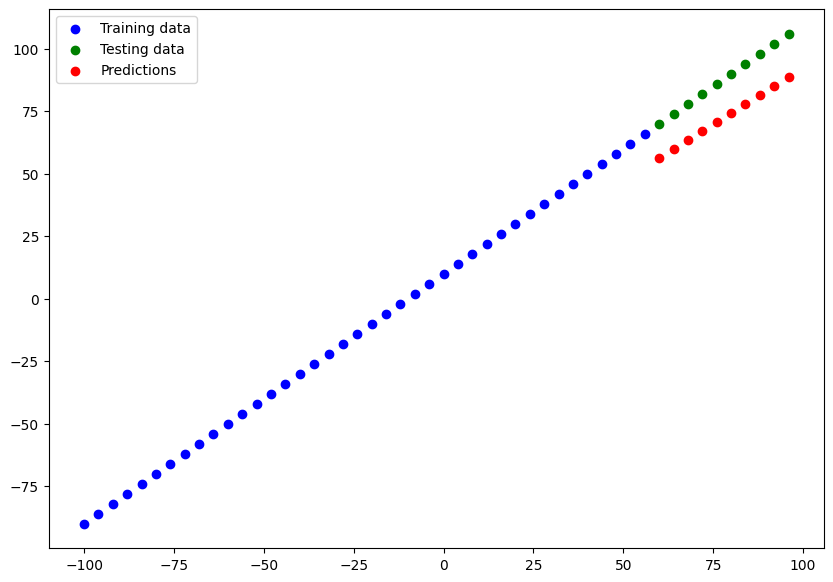

In [46]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_label=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"


In [47]:
# Evaluate the model on the test
model.evaluate(tf.expand_dims(X_test,axis=-1), y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 15.6310 - mae: 15.6310


[15.630975723266602, 15.630975723266602]

In [48]:
# Calculate mean absolute error
mae = tf.keras.losses.mae(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.885506, 14.273388, 14.66127 , 15.049156, 15.437035, 15.824913,
       16.2128  , 16.600677, 16.988556, 17.376442], dtype=float32)>

In [49]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[56.114494],
       [59.726612],
       [63.33873 ],
       [66.95084 ],
       [70.562965],
       [74.17509 ],
       [77.7872  ],
       [81.39932 ],
       [85.011444],
       [88.62356 ]], dtype=float32)>

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [51]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56.114494, 59.726612, 63.33873 , 66.95084 , 70.562965, 74.17509 ,
       77.7872  , 81.39932 , 85.011444, 88.62356 ], dtype=float32)>

In [52]:
# Calculate the mean absolute error
mae = tf.metrics.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=15.630975723266602>

In [53]:
# Calculate the mean square error
mse = tf.metrics.mse(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=245.56857299804688>

In [54]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true, y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true, y_pred)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> .....
```
1. Get more data - get more examples for your model to train on ( more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger ( using a more complex model ) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modellling experiments:

1. `model_1` - same as original mdoel, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

** Build `model_1`

In [55]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 17.3479 - mae: 17.3479 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.9218 - mae: 10.9218
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.8262 - mae: 7.8262
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.7112 - mae: 10.7112
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.6460 - mae: 7.6460
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.8757 - mae: 11.8757
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.9996 - mae: 7.9996
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.6900 - mae: 9.6900
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.9818 - mae: 7.9818
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.6784 - mae: 9.6784
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.9639 - mae: 7.9639
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.6667 - mae: 9.6667
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


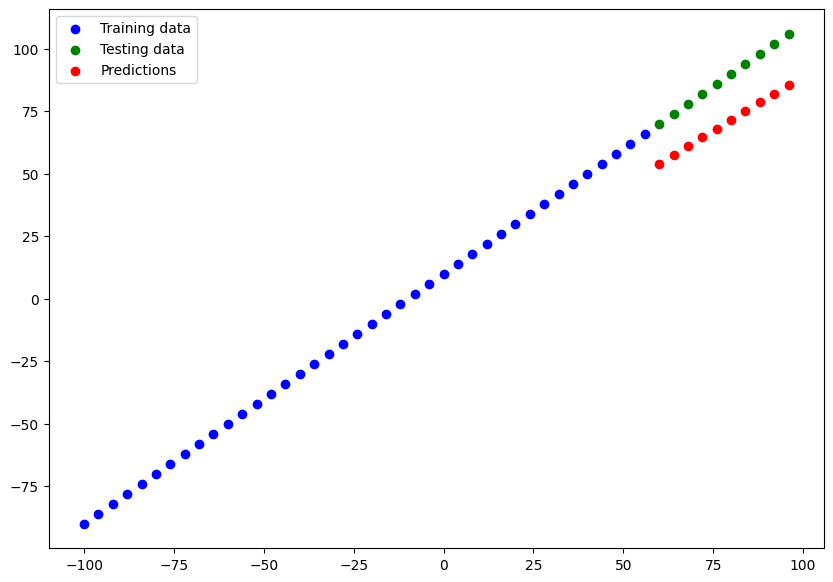

In [56]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)

plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_label=y_test,predictions=y_preds_1)

In [57]:
# Calculate mode_1 evaluation metrics
mae_1 = mae(y_true=y_test, y_pred = tf.squeeze(y_preds_1))
mse_1 = mse(y_true=y_test, y_pred = tf.squeeze(y_preds_1))
mse_1, mae_1

(<tf.Tensor: shape=(), dtype=float32, numpy=332.1416931152344>,
 <tf.Tensor: shape=(), dtype=float32, numpy=18.169979095458984>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [58]:
# 0. Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model_2
model_2.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mse"])

# 3. Train the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 47.4100 - mse: 3186.4124 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 30.3124 - mse: 1254.3704
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 26.7568 - mse: 979.4684 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 15.8370 - mse: 382.8447
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 18.8128 - mse: 475.6618
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.4476 - mse: 240.4590 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 15.2291 - mse: 323.2101 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.8105 - mse: 339.3094
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.6960 - mse: 215.4876
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.6386 - mse: 298.8951
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.6284 - mse: 329.7793
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.8293 - mse: 213.7645
Epoch 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


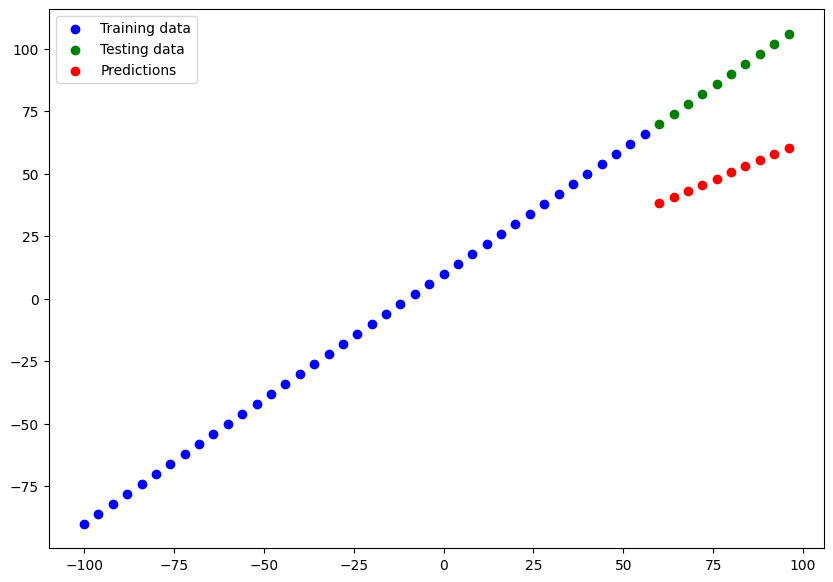

In [59]:
# Predict and Plot Predictions
y_pred_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))

plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_label=y_test, predictions=y_pred_2)

In [60]:
# Calculate Losses
mae_2 = mae(y_true=y_test, y_pred=tf.squeeze(y_pred_2))
mse_2 = mse(y_true=y_test, y_pred=tf.squeeze(y_pred_2))
mae_2, mse_2


(<tf.Tensor: shape=(), dtype=float32, numpy=38.66748809814453>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1515.0599365234375>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [61]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 47.2377 - mae: 47.2377
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 35.6009 - mae: 35.6009
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 25.1287 - mae: 25.1287
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 20.0799 - mae: 20.0799
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 17.9469 - mae: 17.9469
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 17.0170 - mae: 17.0170
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.4243 - mae: 11.4243
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.2271 - mae: 15.2271
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 16.0125 - mae: 16.0125
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.0305 - mae: 12.0305
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 15.0274 - mae: 15.0274
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.0815 - mae: 11.0815
Epoch 13/500
2/2 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


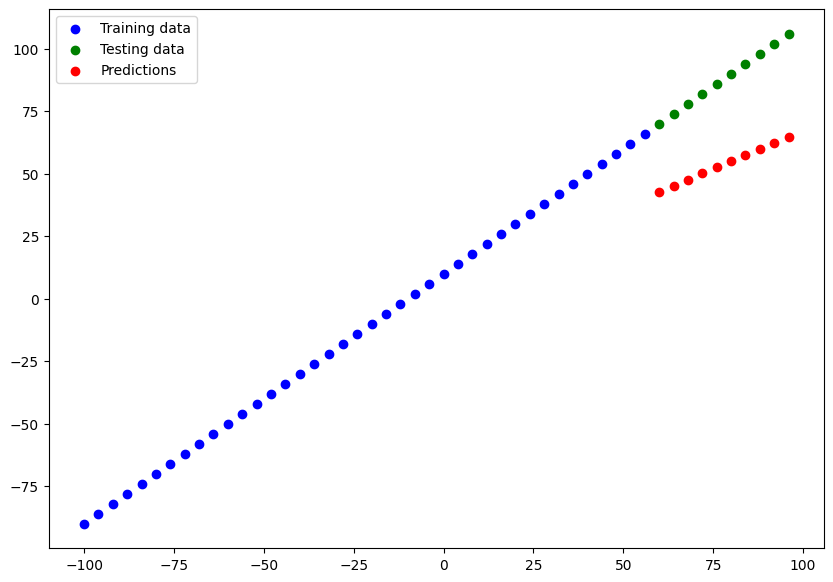

In [62]:
# Make and plot some predictions
y_preds_3 = model_3.predict(tf.expand_dims(X_test, axis=-1) )

plot_predictions(predictions=y_preds_3)

In [63]:
# Calculate model_3 evaluation metrics

mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=34.24085235595703>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1192.7720947265625>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [64]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],["model_2", mae_2.numpy(), mse_2.numpy()], ["model_3", mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.169979,332.141693
1,model_2,38.667488,1515.059937
2,model_3,34.240852,1192.772095


Looks like `model_1` performed the best

In [65]:
model_1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

> **Note:** : One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - component of the TensorFlow library to help track modelling experiments ( we'll see this one later)
* Weights and Biases - a tool for tracking all kinds of machine learning experiments ( plugs straight into tensor board)

## Saving our models

Saving our models allows us to use them outside of Google Colab ( or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our mode's too:

1. The SavedModel format
2. The HDF5 format

In [66]:
# Save model
model_1.save("best_model_SavedModel_format.keras")

In [67]:
# Save model to HDF5 Format
model_1.save("best_model_HDF5_format.h5")

### Loading in a Saved Model


In [68]:
# Load in the SavedModel format model
loaded_savedmodel_format = tf.keras.models.load_model("best_model_SavedModel_format.keras")
loaded_savedmodel_format.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [69]:
# Compare model_2 predictions with SavedModel model predictions
model_1_preds = model_1.predict(tf.expand_dims(tf.cast(X_test, dtype=tf.float32), axis=-1))
loaded_SavedModel_format_preds = loaded_savedmodel_format.predict(tf.expand_dims(tf.cast(X_test, dtype=tf.float32), axis=-1))
model_1_preds, loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


(array([[54.042084],
        [57.550514],
        [61.058945],
        [64.567375],
        [68.075806],
        [71.584236],
        [75.09267 ],
        [78.6011  ],
        [82.10953 ],
        [85.61796 ]], dtype=float32),
 array([[54.042084],
        [57.550514],
        [61.058945],
        [64.567375],
        [68.075806],
        [71.584236],
        [75.09267 ],
        [78.6011  ],
        [82.10953 ],
        [85.61796 ]], dtype=float32))

In [70]:
mae(y_test, tf.squeeze(model_1_preds)), mae(y_test, tf.squeeze(loaded_SavedModel_format_preds))

(<tf.Tensor: shape=(), dtype=float32, numpy=18.169979095458984>,
 <tf.Tensor: shape=(), dtype=float32, numpy=18.169979095458984>)

### Download a model ( or any other file ) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).

In [71]:
# Download a file from Google Collab
from google.colab import files
files.download("best_model_SavedModel_format.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### A larger example

In [72]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# REad in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [74]:
# Lets try to one-hot enocde our DataFrame so its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [75]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [76]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [77]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [78]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([ tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [79]:
# Check the results of the insurance mdoel on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3234.0247 - mae: 3234.0247  


[3170.3681640625, 3170.3681640625]

> Right now it looks like our model isn't performing too well... let's try and improve it!
To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer same model for 200 epochs
3. Use an different optimizer and metric and loss function



In [81]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13269.4395 - mae: 13269.4395
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13114.2881 - mae: 13114.2881
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12797.7764 - mae: 12797.7764
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12168.3359 - mae: 12168.3359
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11083.7373 - mae: 11083.7373
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9648.3438 - mae: 9648.3438
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8269.8174 - mae: 8269.8174
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7524.8726 - mae: 7524.8726
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7403.6074 - mae: 7403.6074
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7375.7368 - mae: 7375.7368
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7353.9878 - mae: 7353.9878
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [82]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4949.7676 - mae: 4949.7676


[4806.10009765625, 4806.10009765625]

In [87]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [88]:
# Evaulate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3468.8108 - mae: 3468.8108  


[3402.405517578125, 3402.405517578125]

Text(0.5, 0, 'epochs')

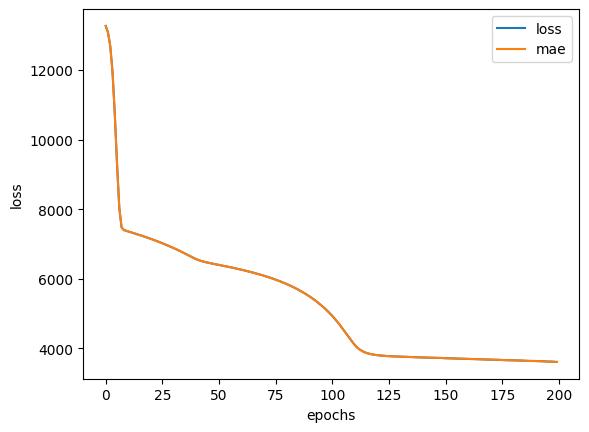

In [89]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you 're not sure n which to use, you could try both and see which performs better

#### The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [ ]:
# The scales are different for different columns we want to make them normalize so lets' check the data

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance csv
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [97]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#  Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data first because we don't want to mess our training data
ct.fit(X_train)

# Transform  training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [98]:
# What does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [101]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [103]:
# Build a neural network model to fit on our normalized data

# Set the seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

# 3. Fit the model
history = insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [106]:
# Evaluate the model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3213.1748 - mae: 3213.1748  


[3160.6298828125, 3160.6298828125]

In [107]:
# summarize the model
insurance_model_4.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,665 (26.04 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,444 (17.36 KB)